In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib as plt

%matplotlib inline

/Users/marenaisabelle/anaconda/envs/my-rdkit-env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/marenaisabelle/anaconda/envs/my-rdkit-env/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/marenaisabelle/anaconda/envs/my-rdkit-env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warni

In [2]:
full_df = pd.read_csv('/Users/marenaisabelle/CODE/GADSI/Act_Smiles')

In [3]:
full_df.head()

,PC_CID,Activity,IC90,CC50,CC50_chi,Max_inhib,Max_inhib_molar,Smiles
0,4091.0,0.0,0.0,0.0,2.337,-6.80,0.63,CN(C)C(=N)N=C(N)N
1,2178.0,0.0,0.0,0.0,3.714,-9.53,2.50,CCCC1=NC=C(C(=N1)N)C[N+]2=CC=CC=C2C
2,4165.0,0.0,0.0,0.0,5.815,2.53,20.00,CC1=C(C=C2C(=C1)CCCS2(=O)=O)S(=O)(=O)N
3,6047.0,0.0,0.0,0.0,7.087,-1.80,20.00,C1=CC(=C(C=C1CC(C(=O)O)N)O)O
4,6419973.0,0.0,0.0,0.0,3.460,-6.54,20.00,C1C(C(OC1N2C=C(C(=O)NC2=O)I)CO)O


In [4]:
x = full_df.Smiles.values
y = full_df.Activity.values

In [5]:
from rdkit import Chem
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

mols, np_fps = [], []
# generate fmolecules
for m in x:
    mol = Chem.MolFromSmiles(m)
    mols.append(mol)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol,2)
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

In [6]:
logreg = LogisticRegression(random_state=77)
scores = cross_val_score(logreg, np_fps, y, cv=5)
print np.mean(scores)

0.88407960199


In [8]:
1.-np.mean(y)

0.84737363726461845

In [11]:
print len(np_fps), len(y)

1009 1009


In [65]:
logreg = LogisticRegression(random_state=77)
X_train, X_test, y_train, y_test = train_test_split(np_fps, y, test_size = 0.4)
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)
print confusion_matrix(y_test, Y_pred)

[[345   3]
 [ 37  19]]


In [70]:
# Test ratio: 98 active/605 inactive
active = [x for x in y_train if x ==1]
len(active)

98

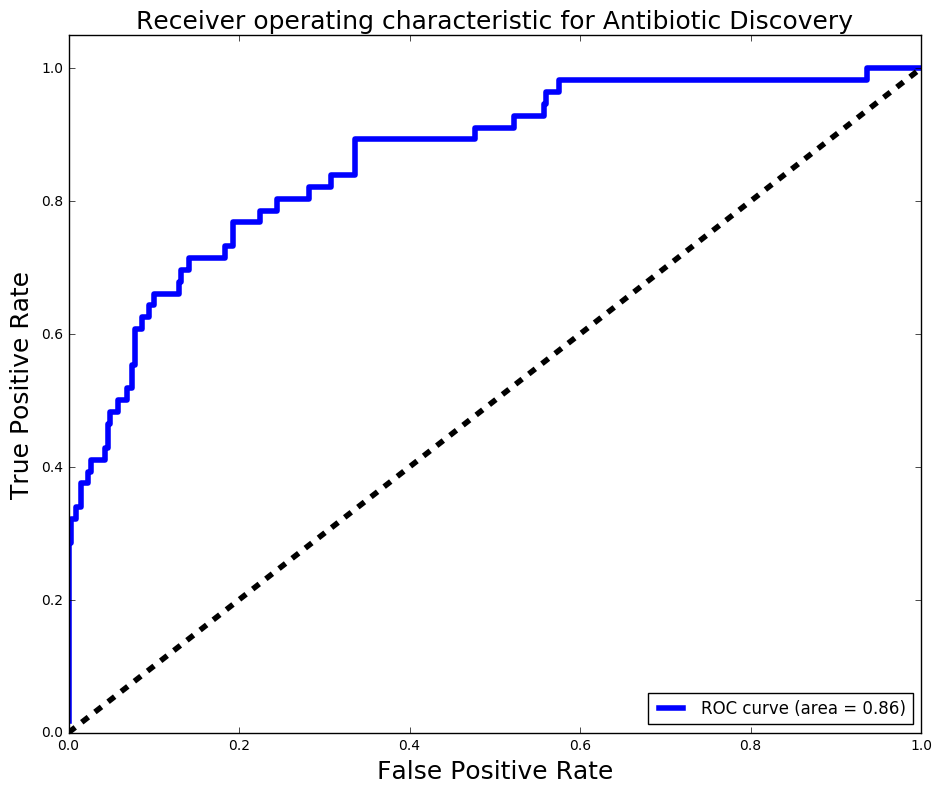

In [67]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


Y_score = logreg.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Antibiotic Discovery', fontsize=18)
plt.legend(loc="lower right")
plt.show()